# Grouping_Students_SelectGroups

### Objective of Project:
The objective of this project is to build a recommendation engine that will group Masters students by their characteristics in terms of fondness of different movie types by using the concept of k-means. This grouping is needed to better understand the preferences of students about movie types which would help to place them in suitable slot in the upcoming movie night as organized as a part of Data Science program. Additionally, it is intended to explore some critical aspects like distributions of ratings by student on different movie types, their correlations etc.

In [2]:
# Loading all used library functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
# loading dataset with only student names and ratings for different kinds of movies
names = ['Name','action','adventure','comedy','crime','drama','fantasy','fiction','horror','mystery','romance','thriller',\
        'documentary','animated']
df = pd.read_excel('Class_2022_10_15__22_05_QZ_Movies Movies & Movies.xlsx',header=None,names=names,\
                   usecols=[0]+list(range(4,17)),skiprows=7,nrows=40)
df

,Name,action,adventure,comedy,crime,drama,fantasy,fiction,horror,mystery,romance,thriller,documentary,animated
0,Akbar,9.90,9.90,9.8,8.5,5.40,7.9,8.90,9.90,6.90,10.00,9.50,3.80,7.4
1,Ali,6.00,6.00,6.0,5.0,7.00,3.0,10.00,3.00,7.00,4.00,5.00,9.00,7.0
2,Anh T,8.90,7.50,5.1,9.4,6.60,7.2,5.50,4.60,7.70,6.40,9.50,2.20,4.8
3,Brandon Inoshita,8.90,9.10,5.6,6.1,1.20,9.3,9.00,6.20,6.30,5.20,8.30,7.20,9.7
4,Changhao Dong,4.00,5.40,8.3,6.5,2.30,1.3,6.80,7.60,4.50,6.40,3.40,7.50,5.5
5,Clark Blatter,9.80,8.20,8.5,9.0,6.50,6.9,7.20,4.20,7.40,6.90,7.30,6.50,9.5
6,FRANCIS,6.00,8.00,10.0,8.0,5.00,4.0,10.00,10.00,8.00,7.00,6.00,9.00,10.0
7,HARSH,10.00,4.00,8.0,10.0,8.00,7.0,8.00,3.00,10.00,9.00,10.00,3.00,4.0
8,Haodong Ma,7.00,6.00,9.0,3.0,1.00,4.0,6.00,8.00,7.00,6.00,8.00,2.00,4.0
9,Harini,9.50,8.90,9.8,10.1,7.90,9.7,9.90,5.40,8.60,10.00,9.60,8.70,9.6


In [4]:
# dropping missing students' data
df = df.dropna(axis=0).reset_index(drop=True)
df

,Name,action,adventure,comedy,crime,drama,fantasy,fiction,horror,mystery,romance,thriller,documentary,animated
0,Akbar,9.90,9.90,9.8,8.5,5.40,7.9,8.90,9.90,6.90,10.00,9.50,3.80,7.4
1,Ali,6.00,6.00,6.0,5.0,7.00,3.0,10.00,3.00,7.00,4.00,5.00,9.00,7.0
2,Anh T,8.90,7.50,5.1,9.4,6.60,7.2,5.50,4.60,7.70,6.40,9.50,2.20,4.8
3,Brandon Inoshita,8.90,9.10,5.6,6.1,1.20,9.3,9.00,6.20,6.30,5.20,8.30,7.20,9.7
4,Changhao Dong,4.00,5.40,8.3,6.5,2.30,1.3,6.80,7.60,4.50,6.40,3.40,7.50,5.5
5,Clark Blatter,9.80,8.20,8.5,9.0,6.50,6.9,7.20,4.20,7.40,6.90,7.30,6.50,9.5
6,FRANCIS,6.00,8.00,10.0,8.0,5.00,4.0,10.00,10.00,8.00,7.00,6.00,9.00,10.0
7,HARSH,10.00,4.00,8.0,10.0,8.00,7.0,8.00,3.00,10.00,9.00,10.00,3.00,4.0
8,Haodong Ma,7.00,6.00,9.0,3.0,1.00,4.0,6.00,8.00,7.00,6.00,8.00,2.00,4.0
9,Harini,9.50,8.90,9.8,10.1,7.90,9.7,9.90,5.40,8.60,10.00,9.60,8.70,9.6


### Data exploration

In data exploration mainly insights are produced at 4 different aspects of the dataset. These are the number of students who gave highest and lowest rating to different categories of movies, the relation of different categories of movies and their distributions.

In [5]:
# finding the number of students who gave highest rating for each movie type
types = df.drop(columns='Name').columns.values.tolist()
for t in types:
    m = max(df[t])
    print('Number of students who gave max rating to ',t,'movies are:',len(np.where(df[t]==m)[0].tolist()))

Number of students who gave max rating to  action movies are: 7
Number of students who gave max rating to  adventure movies are: 5
Number of students who gave max rating to  comedy movies are: 7
Number of students who gave max rating to  crime movies are: 1
Number of students who gave max rating to  drama movies are: 1
Number of students who gave max rating to  fantasy movies are: 3
Number of students who gave max rating to  fiction movies are: 6
Number of students who gave max rating to  horror movies are: 5
Number of students who gave max rating to  mystery movies are: 5
Number of students who gave max rating to  romance movies are: 5
Number of students who gave max rating to  thriller movies are: 4
Number of students who gave max rating to  documentary movies are: 2
Number of students who gave max rating to  animated movies are: 6


It is observed that highest number of 7 students gave the highest ratings to action and comedy movies, while only 1 student gave highest rating to crime and drama movies.

In [6]:
for t in types:
    m = min(df[t])
    print('Number of students who gave min rating to ',t,'movies are:',len(np.where(df[t]==m)[0].tolist()))

Number of students who gave min rating to  action movies are: 1
Number of students who gave min rating to  adventure movies are: 1
Number of students who gave min rating to  comedy movies are: 1
Number of students who gave min rating to  crime movies are: 2
Number of students who gave min rating to  drama movies are: 2
Number of students who gave min rating to  fantasy movies are: 1
Number of students who gave min rating to  fiction movies are: 1
Number of students who gave min rating to  horror movies are: 3
Number of students who gave min rating to  mystery movies are: 1
Number of students who gave min rating to  romance movies are: 1
Number of students who gave min rating to  thriller movies are: 1
Number of students who gave min rating to  documentary movies are: 1
Number of students who gave min rating to  animated movies are: 1


The number of students who gave lowest rating to the categories are comparatively less than who gave highest ratings. The highest number of lowest ratings are received by horror movies and then crime and drama, while for the rest categories just one student gave lowest rating.

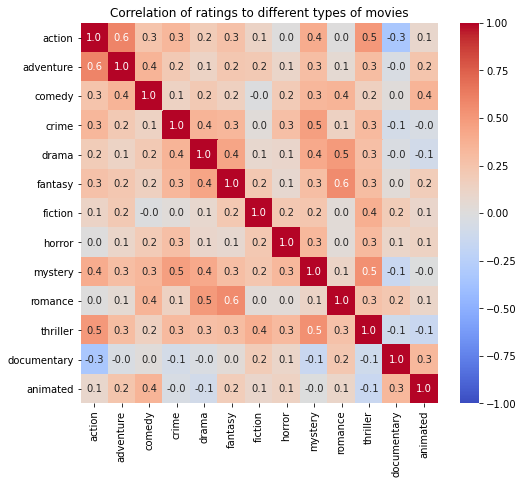

In [7]:
plt.figure(figsize=(8,7))
sns.heatmap(df[types].corr(),vmin=-1,vmax=1,cmap='coolwarm',annot=True,fmt='.1f')
plt.title('Correlation of ratings to different types of movies')
plt.show()

It is observed that the movie categories are most uncorrelated, however, some categories like action-adventure, fantasy-romance are observed to have significantly high positive correlation. This means that most students who like action also like adventure and who like fantasy also like romance type of movies.

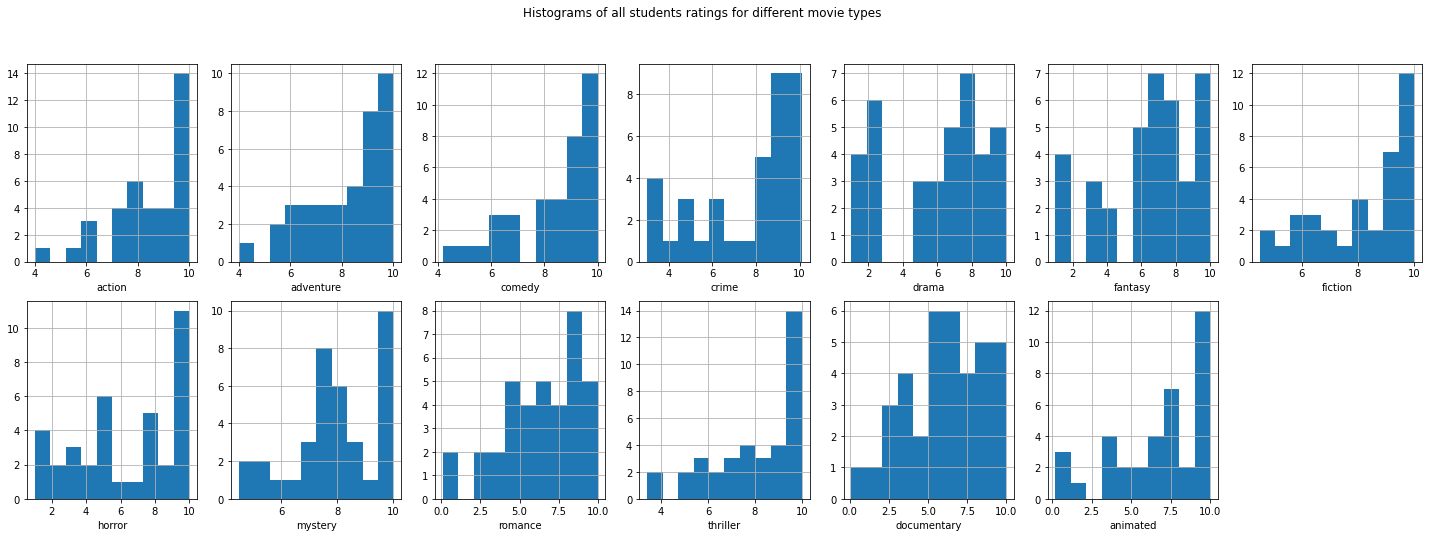

In [8]:
# distribution of ratings of different types of movies
plt.figure(figsize=(25,8))
i = 1
for t in types:
    plt.subplot(2,7,i)
    df[t].hist()
    plt.xlabel(t)
    i = i+1
plt.suptitle('Histograms of all students ratings for different movie types')
plt.show()

The distribution of ratings for different types show that the distributions are all left tailed or most of students gave high ratings to all the categories except for drama a significantly good number of low ratings are observed.

### Dendrogram

Now, for creating the dendrogram the ratings at first five movie categories namely action, adventure, comedy, crime and drama are used.

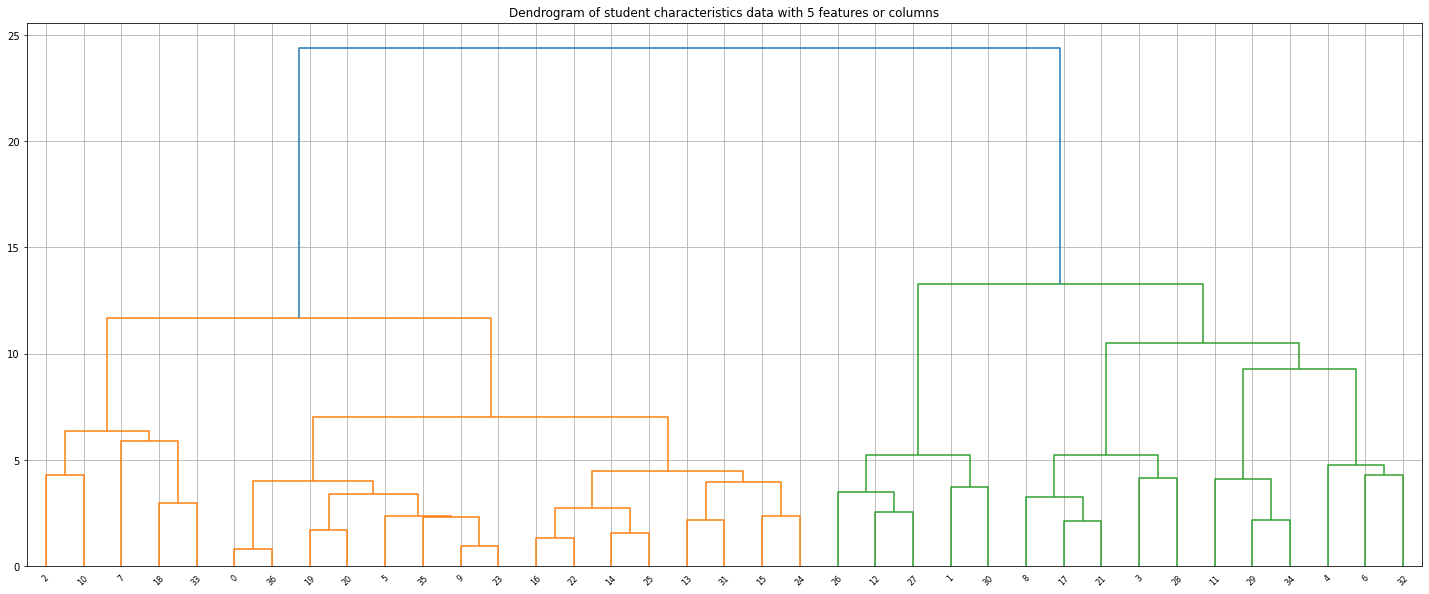

In [9]:
# Selecting the first five movie type rating columns for all students and displaying dendrogram
cols = ['action','adventure','comedy','crime','drama']
X = df[cols]
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title('Dendrogram of student characteristics data with 5 features or columns')
plt.grid()
plt.show()

It is observed that the vertical distance when K=2 is very large compared with vertical distance when k=3 as observed from the dendrogram. Also, the number of unique colours in the dendrogram is 3 or optimal number of clusters is k = 3-1 = 2.

### Step-by-step K-means:

The k-means algorithm is implemented in step by step as understood by researching literature for which the entire function of k-means implementation is provided below. The k-means algorithm is an iterative process where the centroids are updated until the Within Cluster Sum of Square of all points for each cluster is not changing by much in successive two iterations.

Step 1: The first step is to convert the input data frame to a 2D array.

Step 2: The next is to randomly select k data instances as, k number centroids (where k is the number of clusters given as input)

Step 3: Then the tolerance is initialized with high value and an initial WCSS is chosen.

Step 4: This step contains main implementation of k-means and the sub steps under this is executed for many iterations until the tolerance (the difference of WCSS of previous and current iteration fall below very low value say 10^-4).

Step 4.1: The distance matrix dist[i,j] that indicates distance between ith row in dataset and jth centroid is calculated.

Step 4.2: The group or cluster to which each point belongs is then estimated by extracting the index of nearest centroid for that point.

Step 4.3: The centroids for the clusters are then updated by averaging the feature values for each point under corresponding clusters.

Step 4.4: Total WCSS between all points and their respective clusters is then calculated and appended to the WCSS array.

Step 4.5: The tolerance value is updated with the absolute difference between the total WCSS at previous and current iteration.

Step 5: After existing when tolerance fall below specified threshold the estimated cluster indexes for each point in dataset, the centroids and total WCSS at final iteration are returned.

In [10]:
# Step by step implementation of k-means
def kmeans(k,df,seed=0):
    # Step 1: convert data frame into 2D array
    data = np.array(df)
    # Step 2: Set k random instances of data as intial k centroids
    r = len(data)
    np.random.seed(seed)
    clust_idx = np.random.randint(r-1,size=k)
    centers = data[clust_idx]
    # Step 3: set tolerance to a very high value and intialize WCSS array with that value
    tol = 1e6
    wcss_arr = [tol]
    # Step 4: Continuing iteration until the tolerance or difference of WCSS of previous and current iteration fall below 10^-4
    while tol >= 1e-4:
        wcss = 0 # setting WCSS to zero
        # Step 4.1: Calculating the distance matrix
        dist = np.zeros(shape=(r,k))
        for i in range(r):
            for j in range(k):
                dist[i,j] = np.linalg.norm(data[i] - centers[j])
        # Step 4.2: Estimating the cluster indexes of each point in dataset
        pidx = []
        for i in range(r):
            idx = np.where(dist[i]==min(dist[i]))[0]
            if len(idx) > 1:
                idx = int(idx[0])
            else:
                idx = int(idx)   
            pidx.append(idx)
        pidx = np.array(pidx)
        # Step 4.3: Updating the centriods as average of all points within a cluster
        for j in range(k):
            cluster = data[np.where(pidx==j)]
            centers[j] = np.mean(cluster,axis=0)
            # Step 4.4: calculating total WCSS between all points and their respective clusters
            for n in range(len(cluster)):
                wcss = wcss + np.sum((centers[j]-cluster[n])**2)
        # appending calculated WCSS to respective array
        wcss_arr.append(wcss)
        # Step 4.6: updating the tolerance as absolute difference of total WCSS at previous and current iteration
        tol = abs(wcss_arr[-1] - wcss_arr[-2])
    # Step 5: returning estimated cluster indexes of points, centroids and total WCSS at last iteration
    return pidx,centers,wcss

In [11]:
# Running k-means with k=2 and with previously selected columns
pidx,centers,wcss = kmeans(2,df[cols])
print('Centroids of cluster 0:',centers[0,:])
print('Centroids of cluster 1:',centers[1,:])
print('Total within cluster sum of square:',wcss)

Centroids of cluster 0: [8.74541667 8.45791667 8.80833333 8.46666667 7.82875   ]
Centroids of cluster 1: [7.78461538 7.73076923 7.66923077 6.10769231 2.68461538]
Total within cluster sum of square: 474.718582371795


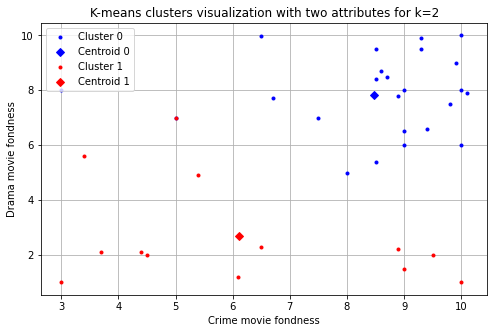

In [12]:
# Visualizing k-means results by two columns with highest difference of centriods between two clusters
data = np.array(df[cols])
plt.figure(figsize=(8,5))
plt.plot(data[np.where(pidx==0)][:,3],data[np.where(pidx==0)][:,4],'b.',centers[0][3],centers[0][4],'bD')
plt.plot(data[np.where(pidx==1)][:,3],data[np.where(pidx==1)][:,4],'r.',centers[1][3],centers[1][4],'rD')
plt.xlabel('Crime movie fondness')
plt.ylabel('Drama movie fondness')
plt.grid()
plt.title('K-means clusters visualization with two attributes for k=2')
plt.legend(['Cluster 0','Centroid 0','Cluster 1','Centroid 1'],loc='upper left')
plt.show()

The result of k-means by the developed algorithm is visualized in a scatterplot where features having the most difference in centroid values namely Crime movie rating or fondness and Drama movie rating are used. It is observed that points belonging to different clusters as coloured differently as much away from each other and their respective centroids are also well separated.

### Sklearn.cluster:

Now, the same k-means clustering is performed using the built-in function of k-means from scikit-learn.

In [13]:
# Applying kmeans by scikit learn module with K=2
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(df[cols])
idx = k_means.labels_
cs = k_means.cluster_centers_
print('Centroids of cluster 0:',cs[0,:])
print('Centroids of cluster 1:',cs[1,:])
print('Total within cluster sum of square:',k_means.inertia_)

Centroids of cluster 0: [8.9947619  8.52333333 8.78095238 8.91428571 7.9947619 ]
Centroids of cluster 1: [7.6375  7.78125 7.91875 5.9625  3.43125]
Total within cluster sum of square: 471.24393452380957


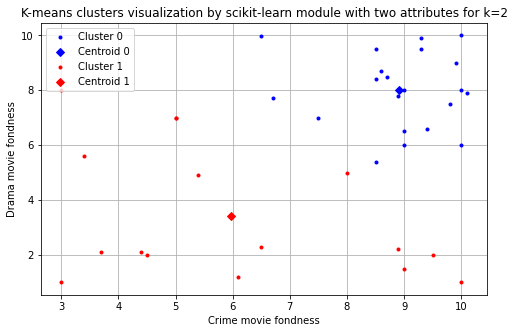

In [14]:
# visualizig the scikit learn kmeans result by scatterplot of same to columns
plt.figure(figsize=(8,5))
plt.plot(data[np.where(idx==0)][:,3],data[np.where(idx==0)][:,4],'b.',cs[0][3],cs[0][4],'bD')
plt.plot(data[np.where(idx==1)][:,3],data[np.where(idx==1)][:,4],'r.',cs[1][3],cs[1][4],'rD')
plt.xlabel('Crime movie fondness')
plt.ylabel('Drama movie fondness')
plt.grid()
plt.title('K-means clusters visualization by scikit-learn module with two attributes for k=2')
plt.legend(['Cluster 0','Centroid 0','Cluster 1','Centroid 1'],loc='upper left')
plt.show()

Comparing the above scatterplot with the previous one it is observed that colours of points are almost identical except just one point which was earlier assigned to cluster 0 is now assigned to cluster 1. However, manual inspection shows that that point should belong to cluster 0 as it is closer to centroid 0. Hence, the developed k-means algorithm performs better than the built-in k-means function. This is also supported by the difference of centroids between the clusters which was earlier wider and WCSS value (given by inertia) is slightly less with built-in kmeans function.

### Prediction

Now, a function is written which accepts the characteristics of a student in terms of fondness to same 5 types of movies and this function uses the calculated centroids by k-means algorithm (as developed earlier) to estimate which cluster or group should the student belong to. Obviously, the student should belong to the cluster whose centroid is closer.

In [15]:
# user defined function that returns cluster index or group based on 5 different characteristics of a student
# 5 different parameters representing characteristics of student in terms of fondness to 
# action,adventure,comedy,crime and drama are given as an array input
def kmeans_predict(arr,centroids):
    dist = []; arr = np.array(arr);
    for i in range(len(centroids)):
        dist.append(np.sqrt(sum((arr-centroids[i,:])**2)))
    mindist = min(dist)
    for i in range(len(dist)):
        if dist[i] == mindist:
            cluster_index = i
    return cluster_index

In [16]:
# running the prediction 10 times with different parameters representing 10 different students
for i in range(10):
    np.random.seed(i)
    arr = 10*np.random.rand(5)
    cluster_index = kmeans_predict(arr,centers)
    print('Student %i characteristics: action = %.2f,adventure = %.2f,comedy = %.2f,crime = %.2f,drama = %.2f'\
          %(i+1,arr[0],arr[1],arr[2],arr[3],arr[4]))
    print('Student %i estimated cluster or group by K-means = %i' %(i+1,cluster_index))

Student 1 characteristics: action = 5.49,adventure = 7.15,comedy = 6.03,crime = 5.45,drama = 4.24
Student 1 estimated cluster or group by K-means = 1
Student 2 characteristics: action = 4.17,adventure = 7.20,comedy = 0.00,crime = 3.02,drama = 1.47
Student 2 estimated cluster or group by K-means = 1
Student 3 characteristics: action = 4.36,adventure = 0.26,comedy = 5.50,crime = 4.35,drama = 4.20
Student 3 estimated cluster or group by K-means = 1
Student 4 characteristics: action = 5.51,adventure = 7.08,comedy = 2.91,crime = 5.11,drama = 8.93
Student 4 estimated cluster or group by K-means = 0
Student 5 characteristics: action = 9.67,adventure = 5.47,comedy = 9.73,crime = 7.15,drama = 6.98
Student 5 estimated cluster or group by K-means = 0
Student 6 characteristics: action = 2.22,adventure = 8.71,comedy = 2.07,crime = 9.19,drama = 4.88
Student 6 estimated cluster or group by K-means = 1
Student 7 characteristics: action = 8.93,adventure = 3.32,comedy = 8.21,crime = 0.42,drama = 1.08
St

The developed prediction function is tested with random ratings in five movie categories for 10 different instances representing 10 hypothetical students and gives its group or cluster index. It is observed that with the generated random ratings 7 students are placed in cluster 1 while only 3 students are placed in cluster 0.

### Recommendation:

Summarizing the entire project, it can be stated that the recommendation engine that groups students based on their characteristics regarding different types of movie fondness has been successfully developed by k-means clustering and results are also visualized that shows good quality of grouping. The rating attributes are also explored by visualizations which show most of them are unrelated except action-adventure and romance-fantasy. Also, most student gave good rating to most kinds of movies.  The concept of how k-means works is learnt while building the recommendation engine and developed algorithm is found to perform better than built-in k-means function. This engine can be used for new students by just giving input of student's rating in the mentioned five different kinds of movies and centroids for the clusters as obtained earlier by fitting the developed k-means and the engine will output the correct group index to which the student should belong. 

Thus, as found from the analysis optimally the existing students can be divided into two groups. The group 0 or cluster 0 has high preferences for action, adventure, comedy, crime and drama movies, however, group 1 have relative low preferences for these especially they do not like drama movies much. Hence, using the predicted group index of each student the movies to played in movie night is recommended to be customized as per the movie types which are mostly like by corresponding group.